In [5]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

In [6]:
#Import the dataset from specified location

data = pd.read_csv('/content/indian_liver_patient.csv')

In [7]:
#Showing the data from top 5

data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
#Handling missing values

#checking for null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
#checking for null values
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [10]:
#sum those null values
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
#Cleaning the data before processing

data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].replace(np.NaN, data['Albumin_and_Globulin_Ratio'].mean() )


In [12]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [13]:
#Initializing and split the data into X and y

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [14]:
X

array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
       [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
       [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
       [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
       [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [15]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,

In [16]:
#Handling categorical values

from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
X[:, 1] = lc.fit_transform(X[:, 1])

In [17]:
X

array([[65, 0, 0.7, ..., 6.8, 3.3, 0.9],
       [62, 1, 10.9, ..., 7.5, 3.2, 0.74],
       [62, 1, 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 1, 0.8, ..., 6.4, 3.2, 1.0],
       [31, 1, 1.3, ..., 6.8, 3.4, 1.0],
       [38, 1, 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [18]:
#Exploratory data analysis

data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


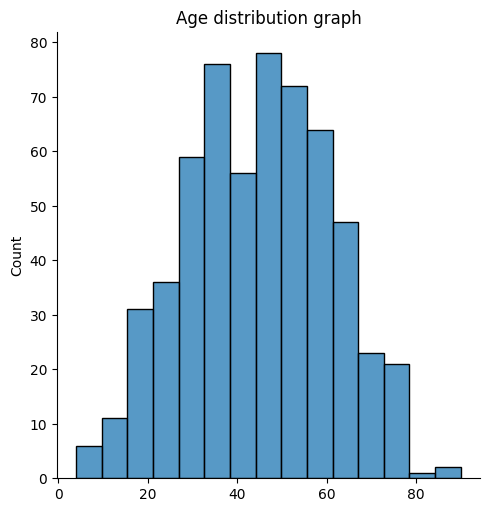

In [19]:
#visual analysis
#univariate analysis

sns.displot(X[:,0])
plt.title('Age distribution graph')
plt.show()

<ipython-input-20-cf37b84ce040>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

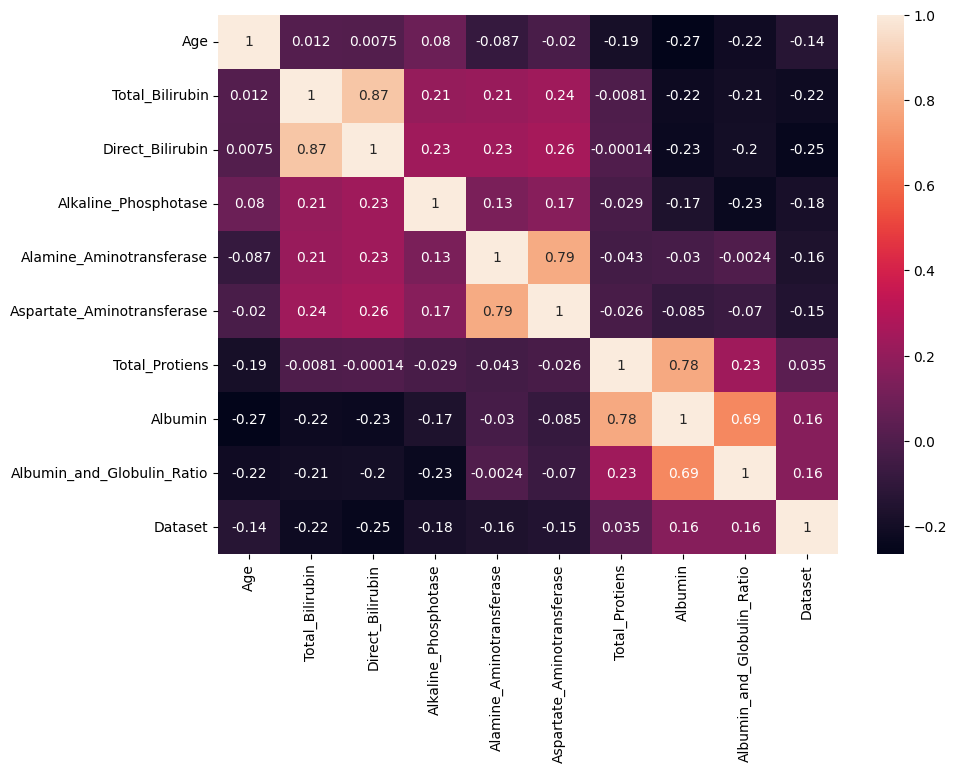

In [20]:
#Multivariate analysis

plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

In [21]:
# spliting the data into train test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
std_xtrain = ss.transform(x_train)
std_xtest = ss.transform(x_test)

In [23]:
!pip install imbalanced-learn

In [24]:
#Handling imbalance data

from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [25]:
from collections import Counter
Counter(y_train)

Counter({1: 329, 2: 137})

In [26]:
x_train_smote, y_train_smote = smote.fit_resample(std_xtrain, y_train)


In [27]:
from collections import Counter
Counter(y_train_smote)

Counter({1: 329, 2: 329})

In [74]:
#Model building
#Training the model in multiple algorithms


#Random Forest Model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train_smote, y_train_smote)
y_predict = model1.predict(std_xtest)
rfc1 = accuracy_score(y_test, y_predict)
rfc1
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.82      0.77      0.79        87
           2       0.43      0.50      0.46        30

    accuracy                           0.70       117
   macro avg       0.62      0.64      0.63       117
weighted avg       0.72      0.70      0.71       117



In [75]:
rfc1

0.7008547008547008

In [73]:
#cross_val_score with default parameters

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
skf = StratifiedKFold(n_splits = 5)

print(cross_val_score(rf, x_train_smote, y_train_smote, cv = skf, scoring = 'accuracy'))
rfc2 = cross_val_score(rf, x_train_smote, y_train_smote, cv = skf, scoring = 'accuracy').mean()
rfc2


[0.75       0.76515152 0.81818182 0.80152672 0.8778626 ]


0.8025445292620865

In [134]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
rfoc = RandomForestClassifier()

skf = StratifiedKFold(n_splits = 5)

hyper_params = {'criterion':['gini', 'entropy'],
                'ccp_alpha':np.linspace(0,0.0000001,3),
                'max_features':np.linspace(0.3,0.8,6),
                'max_samples':np.linspace(0.9,1,3),
                'n_estimators':range(80,121,10)}

rcv = RandomizedSearchCV(rfoc, param_distributions = hyper_params, cv = skf, scoring = 'accuracy')

rcv.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'ccp_alpha': array([0.e+00, 5.e-08, 1.e-07]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'max_samples': array([0.9 , 0.95, 1.  ]),
                                        'n_estimators': range(80, 121, 10)},
                   scoring='accuracy')

In [135]:
rcv.best_score_

0.8055748322923897

In [136]:
rcv.best_params_

{'n_estimators': 110,
 'max_samples': 0.9,
 'max_features': 0.6000000000000001,
 'criterion': 'gini',
 'ccp_alpha': 0.0}

In [31]:
#Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_smote, y_train_smote)
y_preds = dt.predict(std_xtest)
dtc = accuracy_score(y_test, y_preds)
dtc
print(classification_report(y_test, y_preds))



              precision    recall  f1-score   support

           1       0.80      0.76      0.78        87
           2       0.40      0.47      0.43        30

    accuracy                           0.68       117
   macro avg       0.60      0.61      0.61       117
weighted avg       0.70      0.68      0.69       117



In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier(random_state = 1)

hyper_params = {'n_estimators':range(50, 121, 5),
                'learning_rate':np.linspace(0.3, 0.5, 20),
                'subsample':(0.5, 1, 6),
                'max_depth':(3,8,6)}

skf = StratifiedKFold(n_splits = 5)

rcv = RandomizedSearchCV(gbc, param_distributions = hyper_params, cv = skf, scoring = 'accuracy')

rcv.fit(x_train_smote, y_train_smote)





RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=GradientBoostingClassifier(random_state=1),
                   param_distributions={'learning_rate': array([0.3       , 0.31052632, 0.32105263, 0.33157895, 0.34210526,
       0.35263158, 0.36315789, 0.37368421, 0.38421053, 0.39473684,
       0.40526316, 0.41578947, 0.42631579, 0.43684211, 0.44736842,
       0.45789474, 0.46842105, 0.47894737, 0.48947368, 0.5       ]),
                                        'max_depth': (3, 8, 6),
                                        'n_estimators': range(50, 121, 5),
                                        'subsample': (0.5, 1, 6)},
                   scoring='accuracy')

In [34]:
rcv.best_params_

{'subsample': 0.5,
 'n_estimators': 90,
 'max_depth': 8,
 'learning_rate': 0.4157894736842105}

In [35]:
rcv.best_score_

0.8101087207957438

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier(n_estimators = 90, learning_rate = 0.4157894736842105, subsample= 0.5, max_depth = 8)
gbc.fit(x_train_smote, y_train_smote)


GradientBoostingClassifier(learning_rate=0.4157894736842105, max_depth=8,
                           n_estimators=90, subsample=0.5)

In [123]:
preds = gbc.predict(std_xtest)
preds

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 1, 1, 2])

In [124]:
acc1 = accuracy_score(y_test, preds)
acc1

0.6837606837606838

In [37]:
#KNN Model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_smote, y_train_smote)
y_prediction = knn.predict(std_xtest)
acc = accuracy_score(y_test, y_prediction)
acc
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           1       0.81      0.51      0.62        87
           2       0.32      0.67      0.43        30

    accuracy                           0.55       117
   macro avg       0.57      0.59      0.53       117
weighted avg       0.69      0.55      0.57       117



In [38]:
#LogisticRegression model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_smote, y_train_smote)
y_predic = lr.predict(std_xtest)
accs = accuracy_score(y_test, y_predic)
accs
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           1       0.96      0.55      0.70        87
           2       0.42      0.93      0.58        30

    accuracy                           0.65       117
   macro avg       0.69      0.74      0.64       117
weighted avg       0.82      0.65      0.67       117



In [39]:
#Artificial Neural Network model(ANN)

import tensorflow as tf
tf.__version__


'2.14.0'

In [44]:
#initializing the ann

ann = tf.keras.models.Sequential()

#adding the fist hidden layer and input layer

ann.add(tf.keras.layers.Dense(units = 100, activation ='relu'))

#adding the second hidden layer

ann.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))

#adding output layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#compiling the ann

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#training the ann

ann.fit(std_xtrain, y_train, batch_size = 100, validation_split = 0.2, epochs =100)


Epoch 1/100
4/4 [==============================] - 2s 94ms/step - loss: 0.2797 - accuracy: 0.7016 - val_loss: 0.0555 - val_accuracy: 0.7234
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: -0.0196 - accuracy: 0.7016 - val_loss: -0.2129 - val_accuracy: 0.7234
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: -0.2691 - accuracy: 0.7016 - val_loss: -0.4588 - val_accuracy: 0.7234
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: -0.5102 - accuracy: 0.7016 - val_loss: -0.6991 - val_accuracy: 0.7234
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: -0.7529 - accuracy: 0.7016 - val_loss: -0.9477 - val_accuracy: 0.7234
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: -0.9996 - accuracy: 0.7016 - val_loss: -1.2174 - val_accuracy: 0.7234
Epoch 7/100
4/4 [==============================] - 0s 26ms/step - loss: -1.2764 - accuracy: 0.7016 - val_loss: -1.5187 - val_accuracy: 0.7234
Epoch 8/

In [45]:
ann.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

1/1 [==============================] - 0s 312ms/step


array([[1.]], dtype=float32)

In [46]:
knn.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

array([1])

In [47]:
dt.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

array([2])

In [51]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

array([1])

In [ ]:
#comparing the models

In [76]:
acc_smote = [['KNN Classifier', acc], ['RandomForestClassifier', rfc1],
             ['DecisionTreeClassifier', dtc], ['LogisticRegression', accs]]

liver_patients_prediction = pd.DataFrame(acc_smote, columns = ['Classification_models', 'accuracy_score'])
liver_patients_prediction



,Classification_models,accuracy_score
0,KNN Classifier,0.547009
1,RandomForestClassifier,0.700855
2,DecisionTreeClassifier,0.683761
3,LogisticRegression,0.649573


In [77]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [83]:
val = model.feature_importances_
val

array([0.1173637 , 0.02692156, 0.10712622, 0.1065314 , 0.11993009,
       0.11373492, 0.1161573 , 0.09294747, 0.09930525, 0.09998209])

In [118]:
pd.DataFrame(val, columns = ['importance'], index = data.columns[:-1]).sort_values(by = 'importance', ascending = False)

,importance
Alkaline_Phosphotase,0.119930
Age,0.117364
Aspartate_Aminotransferase,0.116157
Alamine_Aminotransferase,0.113735
Total_Bilirubin,0.107126
Direct_Bilirubin,0.106531
Albumin_and_Globulin_Ratio,0.099982
Albumin,0.099305
Total_Protiens,0.092947
Gender,0.026922


In [147]:
#saving the model
pickle.dump(model1, open('liver_patients.pkl', 'wb'))

In [148]:
pickled_model = pickle.load(open('liver_patients.pkl', 'rb'))
pickled_model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])